<a href="https://colab.research.google.com/github/osvaldomaguey/sprint7-final-project/blob/main/S7_Version_Estudiante_Project_ConnectaTel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel.

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


---
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [ ]:
# importar librerías
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv') #completa el código
usage = pd.read_csv('/datasets/usage.csv') #completa el código

In [ ]:
# mostrar las primeras 5 filas de plans
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [ ]:
# mostrar las primeras 5 filas de users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [ ]:
# mostrar las primeras 5 filas de usage
usage.head()

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [ ]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [ ]:
# inspección de plans con .info()
print(plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes
None


In [ ]:
# inspección de users con .info()
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB
None


In [ ]:
# inspección de usage con .info()
print(usage.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB
None


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [ ]:
# cantidad de nulos para users
print(users.isna().sum()) # Cantidad de valores nulos)
print()
print(users.isna().mean()) # Proporción de valores nulos)

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64

user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [ ]:
# cantidad de nulos para usage
print(usage.isna().sum)
print()
print(usage.isna().mean())

<bound method NDFrame._add_numeric_operations.<locals>.sum of           id  user_id   type   date  duration  length
0      False    False  False  False     False    True
1      False    False  False  False      True   False
2      False    False  False  False      True   False
3      False    False  False  False     False    True
4      False    False  False  False     False    True
...      ...      ...    ...    ...       ...     ...
39995  False    False  False  False     False    True
39996  False    False  False  False     False    True
39997  False    False  False  False     False    True
39998  False    False  False  False      True   False
39999  False    False  False  False     False    True

[40000 rows x 6 columns]>

id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


In [ ]:
call_nan_count = usage[(usage['type'] == 'call') & (usage['duration'].isna())].shape[0]
print(f"NaNs en duration para type 'call': {call_nan_count}")
text_nan_count = usage[(usage['type'] == 'text') & (usage['length'].isna())].shape[0]
print(f"NaNs en length para type 'text': {text_nan_count}")

NaNs en duration para type 'call': 0
NaNs en length para type 'text': 0


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos.

 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?
**En users, las columnas con NaNs son city (11%) y churn date (88%)**
**En usage, las columnas con NaNs son date (0.1%), duration (.55%) y length (44%)**
  
- Indica qué harías: ¿imputar, eliminar, ignorar?
**Para los casos de churn date, duration y length, recomiendo ignorar. En churn_date esto significa que solo 12% ha cancelado el plan y el resto siguen siendo clientes, por eso salen como NaN porque no han cancelado su plan. Para length y duration los NaNs se deben a que para llamadas se miden en duration (tiempo) y no en caracteres (length), y para text es a la inversa. Por lo tanto es normal que para texto y llamadas existan NaNs en duration y en length porq no se miden así, respectivamente.**
**Para el caso de city en la base users, recomiendo explorar que tipo de missing value es (MCAR, MAR, MNAR) antes de determinar si se ignoran o se imputan**

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [ ]:
# explorar columnas numéricas de users
print('Cantidad sentinel -999: ', users[users['age']==-999].shape[0])
print('Cantidad sentinel 0: ', users[users['age']==0].shape[0])
print()
print(users[['age']].describe())
print()
print('cantidad de unicos user_id: ', users['user_id'].nunique())
duplicated_rows = users[users.duplicated(subset=['user_id'], keep=False)]
print("Filas con user_id duplicado:")
print(duplicated_rows.sort_values('user_id'))

Cantidad sentinel -999:  55
Cantidad sentinel 0:  0

               age
count  4000.000000
mean     33.739750
std     123.232257
min    -999.000000
25%      32.000000
50%      47.000000
75%      63.000000
max      79.000000

cantidad de unicos user_id:  4000
Filas con user_id duplicado:
Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []


- La columna `user_id` **No tiene duplicados, todos los valores son diferentes.**
- La columna `age` **Se encontraron 55 valores con un valor de −999 los cuales se pueden imputar con la mediana.**

In [ ]:
# explorar columnas numéricas de usage
usage[['duration','length']].describe() #con NaNs

,duration,length
count,17924.000000,22104.000000
mean,5.202237,52.127398
std,6.842701,56.611183
min,0.000000,0.000000
25%,1.437500,37.000000
50%,3.500000,50.000000
75%,6.990000,64.000000
max,120.000000,1490.000000


In [ ]:
# explorar columnas numéricas de usage sin NaNs
print("Cantidad de unicos user id: ", usage['user_id'].nunique())
print(f"Cantidad de unicos id: {usage['id'].nunique()}")
duplicated_id= usage[usage.duplicated(subset=['id'], keep=False)]
print(f"ID duplicados: {duplicated_id.sort_values('id')}")
call_metricas = usage[usage['type']=='call']['duration'].describe()
print()
print('Duracion llamadas: ')
print(call_metricas)
text_metricas = usage[usage['type']=='text']['length'].describe()
print()
print('Longitud de mensajes: ')
print(text_metricas)

Cantidad de unicos user id:  3999
Cantidad de unicos id: 40000
ID duplicados: Empty DataFrame
Columns: [id, user_id, type, date, duration, length]
Index: []

Duracion llamadas: 
count    17908.000000
mean         5.099671
std          5.922735
min          0.000000
25%          1.430000
50%          3.500000
75%          6.970000
max        120.000000
Name: duration, dtype: float64

Longitud de mensajes: 
count    22092.000000
mean        51.346370
std         45.638659
min          0.000000
25%         37.000000
50%         50.000000
75%         64.000000
max       1490.000000
Name: length, dtype: float64


- Las columnas `id` y `user_id` hay una diferemcia de 1 dato pero ninguno es repetido o duplicado
- Para la columna `duration` tiene poca dispersion y parece ser que hay valores outliers, ya que el 75% de las llamadas duran casi 7 minutos, pero el valor máximo es de 2 hrs.
- para la columna `length` parece ser que hay valores outliers, ya que el 75% de los mensajes tienen a lo mucho 64 caracteres, mientras que el máximo es de casi 1500 caracteres. También parece que existen mensajes muy cortos (<37 caractetes) por lo menos son 25% de los datos ya que el valor minimo fue cero.

In [ ]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
print(users['city'].value_counts())
print()
print(users['plan'].value_counts())
print()
print(users[columnas_user].describe())

Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
?            96
Name: city, dtype: int64

Basico     2595
Premium    1405
Name: plan, dtype: int64

          city    plan
count     3531    4000
unique       7       2
top     Bogotá  Basico
freq       808    2595


- La columna `city` tiene 7 ciudades donde la más repetida es Bogotá con una frecuencia de 808 celdas. Presenta valores 96 Sentinels (?).
- La columna `plan` tiene 2 posibles valores (básico y premium). El plan más común es el básico con más de la mitad de registros con un total de 2595. No contiene valores sentinels.

In [ ]:
invalid_city = users[users['city']=='?']
print(invalid_city.sample(20))

      user_id first_name last_name  age city                       reg_date  \
532     10532      Sofia     Gomez   69    ?  2022-05-26 16:06:50.502625658   
2821    12821    Mariana   Ramirez   59    ?  2024-02-12 10:36:16.744186048   
1948    11948     Carlos   Ramirez   25    ?  2023-06-18 09:33:37.404351088   
1741    11741      Mateo    Torres   43    ?  2023-04-22 17:13:49.107276824   
471     10471      Mateo   Ramirez   60    ?  2022-05-09 23:14:37.719429858   
626     10626       Luis    Garcia   77    ?  2022-06-21 09:50:54.463615904   
555     10555       Luis     Gomez   66    ?  2022-06-01 23:15:42.535633910   
1151    11151     Carlos     Lopez   74    ?  2022-11-12 03:57:39.564891224   
2655    12655      Mateo     Lopez   43    ?  2023-12-28 23:42:42.940735184   
1473    11473        Ana   Ramirez   30    ?  2023-02-08 08:01:48.027006752   
1       10001      Mateo    Torres   53    ?  2022-01-01 06:34:17.914478619   
3955    13955        Ana     Lopez   59    ?  2024-1

In [ ]:
# explorar columna categórica de usage
usage['type'].describe() # completa el código

count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object

- La columna `type` tiene 2 posibles valores `Call` y `text`, siendo este último el más común, con un poco más de la mitad de los registros (22,092 en total). No presenta valores Sentinels.

---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso.

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?
**En la columna Age, existen 55 edades de -999.**
**En la columna city existen 96 ciudades sin nombre ("?")**
- ¿Qué acción tomarías?
**Para el caso de Age debe imputarse con la mediana para evitar errores, y para el caso de city se deben de eliminar esos registros, ya que solo son el 11% y no hay forma de saber de qué ciudades son**

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [ ]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce') # completa el código

In [ ]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce') # completa el código

In [ ]:
# Revisar los años presentes en `reg_date` de users
print(users['reg_date'].dt.year.value_counts())

2024    1330
2023    1316
2022    1314
2026      40
Name: reg_date, dtype: int64


In [ ]:
invalid_reg_date = users[users['reg_date'].dt.year == 2026]
print(invalid_reg_date.sample(15))

      user_id first_name last_name  age    city   reg_date     plan  \
2200    12200    Mariana   Ramirez   70     MTY 2026-05-10   Basico   
70      10070    Mariana     Gomez   50    CDMX 2026-05-10  Premium   
1896    11896     Carlos     Gomez   52  Bogotá 2026-05-10   Basico   
885     10885        Ana    Torres   73  Bogotá 2026-05-10   Basico   
1627    11627      Mateo     Lopez   39    CDMX 2026-05-10   Basico   
2093    12093      Sofia   Ramirez   48  Bogotá 2026-05-10  Premium   
1047    11047       Luis     Gomez   25       ? 2026-05-10   Basico   
1722    11722      Sofia   Ramirez   26     NaN 2026-05-10  Premium   
320     10320      Sofia    Garcia   74     GDL 2026-05-10  Premium   
948     10948      Sofia    Torres   30     MTY 2026-05-10   Basico   
56      10056       Luis    Garcia   29    CDMX 2026-05-10   Basico   
1314    11314      Sofia     Gomez   36     MTY 2026-05-10   Basico   
2307    12307    Mariana     Lopez   75  Bogotá 2026-05-10   Basico   
1737  

En `reg_date` existen 40 registros con valores inválidos con el año 2026.

In [ ]:
# Revisar los años presentes en `date` de usage
print(usage['date'].dt.year.value_counts())
print(usage['date'].isna().sum())

2024.0    39950
Name: date, dtype: int64
50


In [ ]:
filas_con_nan = usage[usage['date'].isna()]
print(filas_con_nan.sample(15))

          id  user_id  type date  duration  length
21502  21503    11696  call  NaT      2.23     NaN
7879    7880    11347  text  NaT       NaN    35.0
21429  21430    12739  text  NaT       NaN    23.0
16003  16004    11725  text  NaT       NaN    50.0
37046  37047    12871  call  NaT      4.17     NaN
24085  24086    11073  text  NaT       NaN    68.0
4114    4115    12527  text  NaT       NaN    67.0
32797  32798    11947  text  NaT       NaN    71.0
15080  15081    11614  text  NaT       NaN    64.0
25872  25873    13507  call  NaT      1.78     NaN
25640  25641    12700  call  NaT      0.18     NaN
18955  18956    13415  text  NaT       NaN    12.0
6445    6446    12553  text  NaT       NaN    39.0
14232  14233    12752  call  NaT      0.75     NaN
3808    3809    10916  text  NaT       NaN    23.0


En `date` contiene datos únicamente del 2024. Con 50 valores nulos que parecen ser MCAR

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
**Existe 40 fechas fuera de rango particularmente en 2026 en la columna `reg_date`**
**En la columna `date` existen 50 valores nulos.**
- ¿Qué harías con ellas?
**Para `reg_date` se recomienda eliminar esos registros, ya que no se pueden imputar.**
**Para `date` se recomienda eliminar ya que tampoco se pueden imputar y no están relacionados con ninguna otra variable.**

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [ ]:
# Reemplazar -999 por la mediana de age
age_mediana = users['age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [ ]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?',pd.NA)
# Verificar cambios
print(users['city'].value_counts())
print()
print(users[users['city'].isna()])

Bogotá      808
CDMX        730
Medellín    616
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64

      user_id first_name last_name   age  city                      reg_date  \
1       10001      Mateo    Torres  53.0  <NA> 2022-01-01 06:34:17.914478619   
14      10014       Luis    Torres  77.0   NaN 2022-01-04 20:00:10.802700675   
22      10022     Carlos    Torres  37.0   NaN 2022-01-07 00:34:34.118529632   
23      10023       Luis     Lopez  57.0   NaN 2022-01-07 07:08:52.033008252   
48      10048        Ana    Garcia  36.0   NaN 2022-01-14 03:26:19.894973743   
...       ...        ...       ...   ...   ...                           ...   
3975    13975     Carlos    Torres  48.0   NaN 2024-12-24 10:16:50.052513136   
3976    13976      Sofia     Lopez  33.0   NaN 2024-12-24 16:51:07.966991760   
3979    13979       Luis     Lopez  73.0   NaN 2024-12-25 12:34:01.710427616   
3980    13980       Luis    Garcia  61.0   NaN 2024-12-25 19:08:19.624906224  

In [ ]:
# Marcar fechas futuras como NA para reg_date
users['reg_date'] = users['reg_date'].dt.year.replace(2026, pd.NA)

# Verificar cambios
users['reg_date'].value_counts()

2024    1330
2023    1316
2022    1314
Name: reg_date, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [ ]:
# Verificación MAR en usage (Missing At Random) para duration
usage[usage['duration'].isna()].sample(20)

,id,user_id,type,date,duration,length
38051,38052,12126,text,2024-06-21 04:26:30.879771994,NaN,58.0
9234,9235,11486,text,2024-02-11 18:50:14.895372384,NaN,52.0
16421,16422,13441,text,2024-03-15 07:21:54.662866571,NaN,85.0
34485,34486,13103,text,2024-06-05 01:09:52.664816620,NaN,43.0
31903,31904,13632,text,2024-05-24 08:45:08.707717692,NaN,76.0
33316,33317,11457,text,2024-05-30 18:12:28.998724968,NaN,16.0
37275,37276,13833,text,2024-06-17 16:09:58.334958372,NaN,35.0
12620,12621,12158,text,2024-02-27 02:33:58.550963774,NaN,54.0
24609,24610,11033,text,2024-04-21 08:36:15.174379358,NaN,26.0
27974,27975,11047,text,2024-05-06 14:03:08.464711616,NaN,11.0


In [ ]:
# Verificación MAR en usage (Missing At Random) para length
usage[usage['length'].isna()].sample(20)

,id,user_id,type,date,duration,length
30996,30997,10193,call,2024-05-20 06:14:59.122478062,0.13,NaN
5275,5276,13574,call,2024-01-24 20:52:45.559138978,1.41,NaN
2645,2646,10074,call,2024-01-12 23:15:15.052876321,9.34,NaN
14360,14361,11043,call,2024-03-05 23:32:05.958148953,0.54,NaN
37071,37072,13724,call,2024-06-16 18:00:40.501012524,1.19,NaN
1075,1076,13325,call,2024-01-05 20:44:52.507312682,3.43,NaN
9130,9131,11555,call,2024-02-11 07:32:34.038850971,1.78,NaN
14110,14111,10646,call,2024-03-04 20:23:03.514587864,9.25,NaN
909,910,10312,call,2024-01-05 02:43:11.524788119,1.59,NaN
34064,34065,12222,call,2024-06-03 03:26:34.389859746,1.35,NaN


Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`
**Se observa claramente que en ambas columnas es un missing at random value (MAR). En el caso de `call` es debido, a la razón anteriormente señalada, de que las llamadas se miden en duración de tiempo y no en cantidad de caracteres. Mientras que para `text`, es todo lo contrario no se mide en tiempo sino en cantidad de caracteres.**

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico.

**Instrucciones:**:
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [ ]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby('user_id').agg({
    'is_text': 'sum',
    'is_call': 'sum',
    'duration': 'sum'
}).reset_index()


# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns= {
    'is_text': 'cant_mensajes',
    'is_call': 'cant_llamadas',
    'duration': 'cant_minutos_llamada'
})
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = pd.merge(users,usage_agg, on = ['user_id'], how= 'left')
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [ ]:
# Resumen estadístico de las columnas numéricas
col_numeric = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
user_profile[col_numeric].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.122250,5.524381,4.478120,23.317054
std,17.690408,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,47.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


In [ ]:
# Distribución porcentual del tipo de plan
user_profile['plan'].value_counts(normalize = True) *100

Basico     64.875
Premium    35.125
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada`

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda)

**Hint**  
Para cada histograma,
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

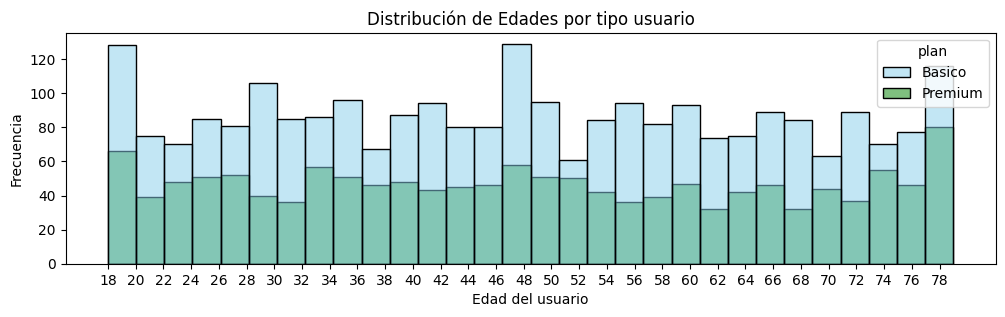

In [ ]:
# Histograma para visualizar la edad (age)
plt.figure(figsize=(12,3))
sns.histplot(data = user_profile, x='age', bins = 30, hue = 'plan', palette = ['skyblue', 'green'])
plt.xlabel('Edad del usuario')
plt.ylabel('Frecuencia')
plt.xticks(range(18, 80, 2))
plt.title(f"Distribución de Edades por tipo usuario")
plt.show()

💡Insights:
- La distribución para Edad es simétrica, y existen 3 picos en donde es más frecuente la contratación de un plan que son: de 18-20 años, 47-48 años, y finalmente de 77-78 años.
- El plan más atractivo para la mayoría de las personas independientemente de la edad es el plan Básico.

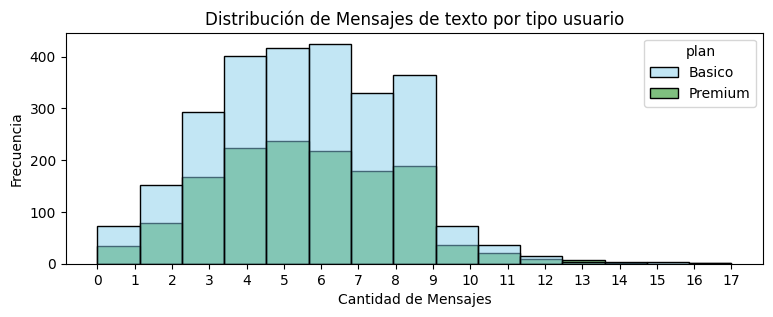

In [ ]:
# Histograma para visualizar la cant_mensajes
plt.figure(figsize=(9,3))
sns.histplot(data = user_profile, x='cant_mensajes', bins = 15, hue = 'plan', palette = ['skyblue', 'green'])
plt.xlabel('Cantidad de Mensajes')
plt.ylabel('Frecuencia')
plt.xticks(range(0, 18))
plt.title(f"Distribución de Mensajes de texto por tipo usuario")
plt.show()

💡Insights:
- La distribución para esta sesgada a la derecha, ya que existen pocos usuraios que envían más de 9 mensajes.
- Lo usuarios del plan básico usan más los mensajes de texto, pero puede deberse a que son más que los usuarios premium. No obstante, el uso de los usuarios en ambos planes es bajo, esto puede deberse a utilizan otras aplicaciones de mensajería.

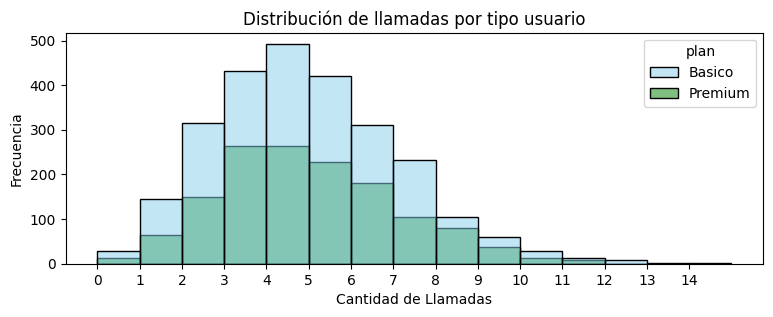

In [ ]:
# Histograma para visualizar la cant_llamadas
plt.figure(figsize=(9,3))
sns.histplot(data = user_profile, x='cant_llamadas', bins = 15, hue = 'plan', palette = ['skyblue', 'green'])
plt.xlabel('Cantidad de Llamadas')
plt.ylabel('Frecuencia')
plt.xticks(range(0, 15))
plt.title(f"Distribución de llamadas por tipo usuario")
plt.show()

💡Insights:
- La distribución para esta sesgada a la derecha, ya que existen pocos usuraios realizan más de 9 llamadas.
- Lo usuarios del plan básico también hacen más llamadas que los usarios premium y puede deberse a la misma razon que el uso de mensajes de texto (son más que los usuarios premium). No obstante, el uso de las llamadas en ambos planes es bajo, esto puede deberse a la facilidad que brindan otras aplicaciones de mensajería y de llamadas.

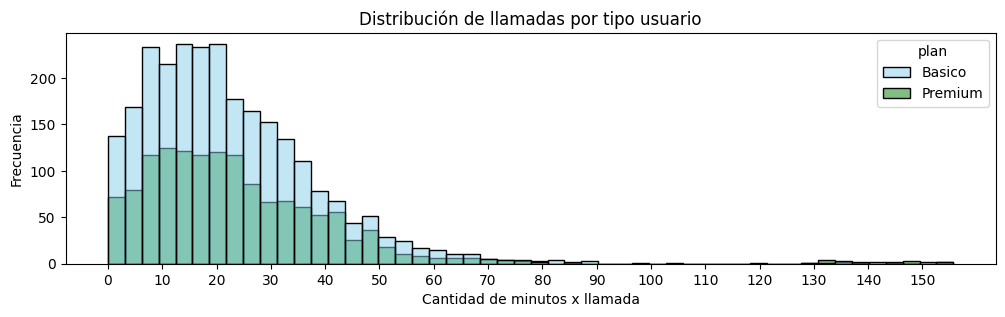

In [ ]:
# Histograma para visualizar la cant_minutos_llamada
plt.figure(figsize=(12,3))
sns.histplot(data = user_profile, x='cant_minutos_llamada', bins = 50, hue = 'plan', palette = ['skyblue', 'green'])
plt.xlabel('Cantidad de minutos x llamada')
plt.ylabel('Frecuencia')
plt.xticks(range(0, 160,10))
plt.title(f"Distribución de llamadas por tipo usuario")
plt.show()

💡Insights:
- La distribución para esta muy sesgada a la derecha, ya que existen llamadas de más de 50 min hasta 155 min.
- Los usurios del plan básico realizan llamadas más largas que los usuarios premium, posiblemente se debe a que son más en cantidad. Para las llamadas largas ambos tipos de usuarios tienden a hacerlas por lo que no hay un patron detectable.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age`
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

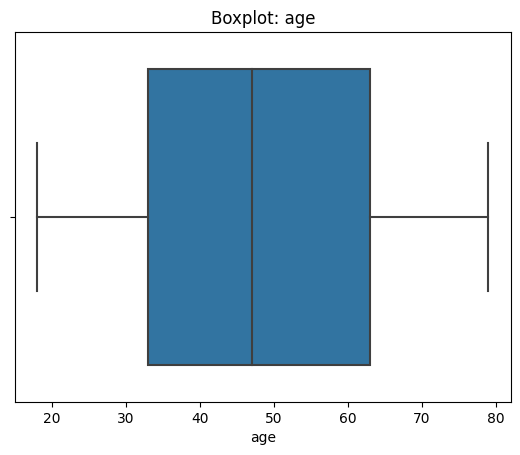

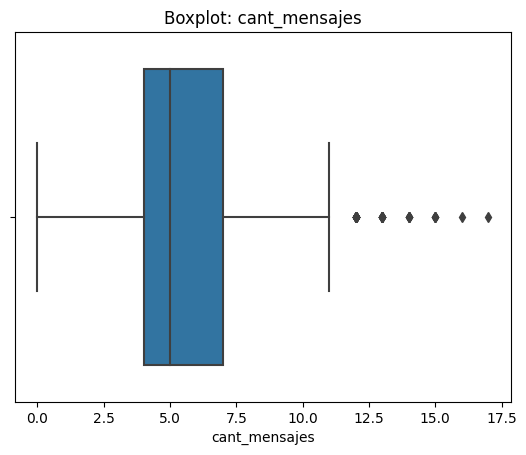

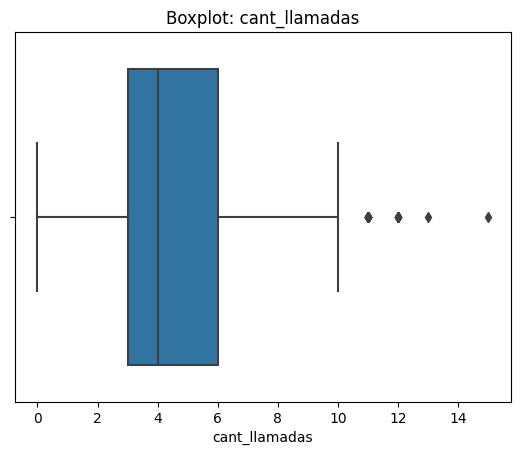

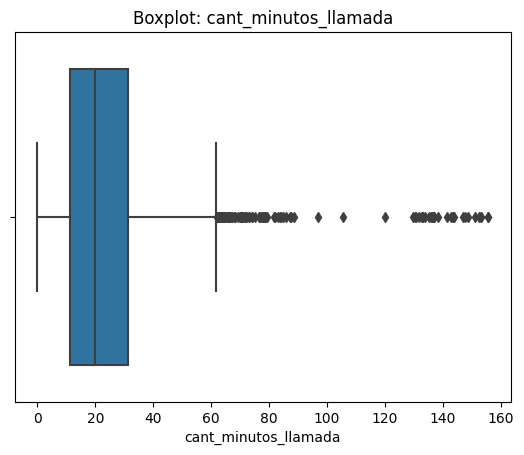

In [ ]:
# Visualizando usando BoxPlot
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
for col in columnas_numericas:
    sns.boxplot(data=user_profile, x=col)
    plt.title(f'Boxplot: {col}')
    plt.show()

💡Insights:
- Age: no presenta outliers
- cant_mensajes: Presenta unos cuantos valores outliers, la mitad leves y la otra mitad extremos
- cant_llamadas: Cuenta con pocos valores outliers y solo uno es extremo
- cant_minutos_llamada: Su dispersion es poca pero tiene muchos valores outliers, la mayoria extremos

In [ ]:
columnas_limites = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

Q1 = {}
Q3 = {}
IQR = {}
limite_inferior = {}
limite_superior = {}

for col in columnas_limites:

    Q1[col] = user_profile[col].quantile(0.25)
    Q3[col] = user_profile[col].quantile(0.75)
    IQR[col] = Q3[col] - Q1[col]

    limite_inferior[col] = Q1[col] - 1.5 * IQR[col]
    limite_superior[col] = Q3[col] + 1.5 * IQR[col]

    print(f"📊 {col}:")
    print(f"   Q1: {Q1[col]:.2f}")
    print(f"   Q3: {Q3[col]:.2f}")
    print(f"   IQR: {IQR[col]:.2f}")
    print(f"   Límites outliers: [{limite_inferior[col]:.2f}, {limite_superior[col]:.2f}]")
    print("-" * 50)

📊 age:
   Q1: 33.00
   Q3: 63.00
   IQR: 30.00
   Límites outliers: [-12.00, 108.00]
--------------------------------------------------
📊 cant_mensajes:
   Q1: 4.00
   Q3: 7.00
   IQR: 3.00
   Límites outliers: [-0.50, 11.50]
--------------------------------------------------
📊 cant_llamadas:
   Q1: 3.00
   Q3: 6.00
   IQR: 3.00
   Límites outliers: [-1.50, 10.50]
--------------------------------------------------
📊 cant_minutos_llamada:
   Q1: 11.12
   Q3: 31.41
   IQR: 20.30
   Límites outliers: [-19.32, 61.86]
--------------------------------------------------


In [ ]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.122250,5.524381,4.478120,23.317054
std,17.690408,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,47.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


💡Insights:
- cant_mensajes: Recomiendo mantener porqué son valores realistas y no parece que sean debidos a un error
- cant_llamadas: Recomiendi mantener porqué son valores realistas y no parece que sean debidos a un error
- cant_minutos_llamada: mantener pero winsorizarlos para reducir el impacto de los mismos sin eliminarlos

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [ ]:
# Crear columna grupo_uso
def clasificacion_uso(row):
    mensajes = row['cant_mensajes']
    llamadas = row['cant_llamadas']

    if pd.isna(mensajes) or pd.isna(llamadas):
        return "Error de Datos"

    if llamadas < 5 and mensajes < 5:
        return "Bajo uso"
    elif llamadas < 10 and mensajes < 10:
        return "Uso medio"
    else:
        return "Alto uso"

user_profile['grupo_uso'] = user_profile.apply(clasificacion_uso, axis = 1)
print(user_profile['grupo_uso'].value_counts(normalize= True))

Uso medio         0.73575
Bajo uso          0.19450
Alto uso          0.06950
Error de Datos    0.00025
Name: grupo_uso, dtype: float64


In [ ]:
user_profile[user_profile['grupo_uso'] == 'Error de Datos']

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
1082,11082,Luis,Gomez,39.0,CDMX,2022,Basico,NaN,NaN,NaN,NaN,Error de Datos


In [ ]:
# verificar cambios
user_profile.sample(15)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
1265,11265,Mariana,Lopez,64.0,MTY,2022,Basico,"1,72981E+18",8.0,3.0,27.80,Uso medio
3558,13558,Sofia,Torres,67.0,Cali,2024,Premium,NaN,5.0,8.0,32.58,Uso medio
737,10737,Luis,Gomez,47.0,MTY,2022,Basico,NaN,8.0,3.0,22.41,Uso medio
3473,13473,Ana,Lopez,47.0,Bogotá,2024,Basico,NaN,6.0,4.0,21.07,Uso medio
653,10653,Mateo,Gomez,51.0,Bogotá,2022,Premium,NaN,9.0,4.0,21.27,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022,Basico,NaN,5.0,10.0,33.18,Alto uso
1022,11022,Mariana,Garcia,72.0,Bogotá,2022,Basico,NaN,5.0,5.0,38.45,Uso medio
1991,11991,Luis,Gomez,65.0,Medellín,2023,Basico,NaN,4.0,9.0,49.67,Uso medio
1082,11082,Luis,Gomez,39.0,CDMX,2022,Basico,NaN,NaN,NaN,NaN,Error de Datos
1975,11975,Carlos,Garcia,43.0,CDMX,2023,Premium,NaN,3.0,3.0,8.87,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [ ]:
# Crear columna grupo_edad
def clasificacion_edad(age):

    if pd.isna(age):
        return "Error de Datos"

    if age < 30:
        return "Joven"
    elif age < 60:
        return "Adulto"
    else:
        return "Adulto Mayor"

user_profile['grupo_edad'] = user_profile['age'].apply(clasificacion_edad)

In [ ]:
user_profile['grupo_edad'].value_counts(normalize= True)

Adulto          0.5045
Adulto Mayor    0.3055
Joven           0.1900
Name: grupo_edad, dtype: float64

In [ ]:
# verificar cambios
user_profile.sample(15)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
3210,13210,Mateo,Ramirez,23.0,MTY,2024,Premium,NaN,8.0,1.0,4.97,Uso medio,Joven
1426,11426,Mariana,Garcia,53.0,CDMX,2023,Basico,NaN,11.0,5.0,39.78,Alto uso,Adulto
718,10718,Ana,Gomez,76.0,Medellín,2022,Basico,NaN,2.0,8.0,60.65,Uso medio,Adulto Mayor
2608,12608,Ana,Ramirez,70.0,GDL,2023,Basico,NaN,4.0,5.0,18.90,Uso medio,Adulto Mayor
976,10976,Ana,Lopez,73.0,CDMX,2022,Basico,NaN,10.0,3.0,8.72,Alto uso,Adulto Mayor
2110,12110,Ana,Ramirez,49.0,NaN,2023,Basico,NaN,6.0,2.0,11.87,Uso medio,Adulto
3446,13446,Sofia,Gomez,35.0,Cali,2024,Basico,NaN,7.0,2.0,12.07,Uso medio,Adulto
2263,12263,Mariana,Lopez,65.0,Cali,2023,Basico,"1,73388E+18",4.0,7.0,20.00,Uso medio,Adulto Mayor
1776,11776,Mariana,Gomez,52.0,Bogotá,2023,Premium,NaN,4.0,5.0,16.21,Uso medio,Adulto
1823,11823,Luis,Lopez,53.0,Bogotá,2023,Premium,NaN,4.0,7.0,40.53,Uso medio,Adulto


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

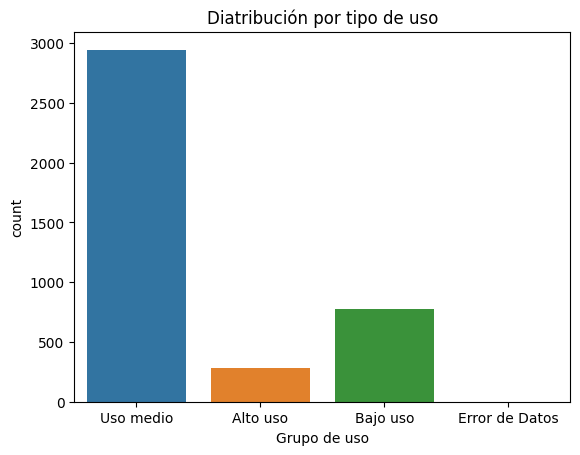

In [ ]:
# Visualización de los segmentos por uso
sns.countplot(data = user_profile, x = 'grupo_uso')
plt.xlabel('Grupo de uso')
plt.title('Diatribución por tipo de uso')
plt.show()

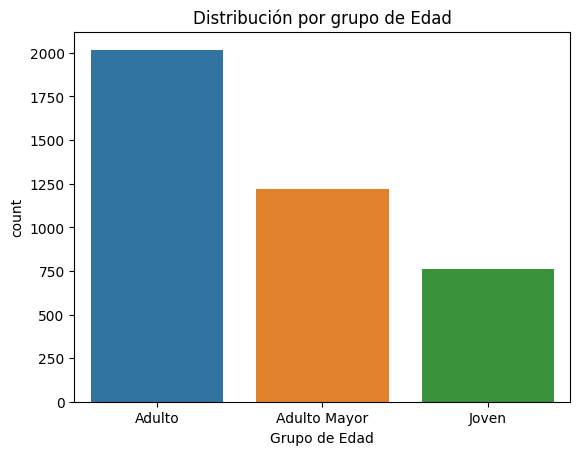

In [ ]:
# Visualización de los segmentos por edad
sns.countplot(data = user_profile, x = 'grupo_edad')
plt.xlabel('Grupo de Edad')
plt.title('Distribución por grupo de Edad')
plt.show()

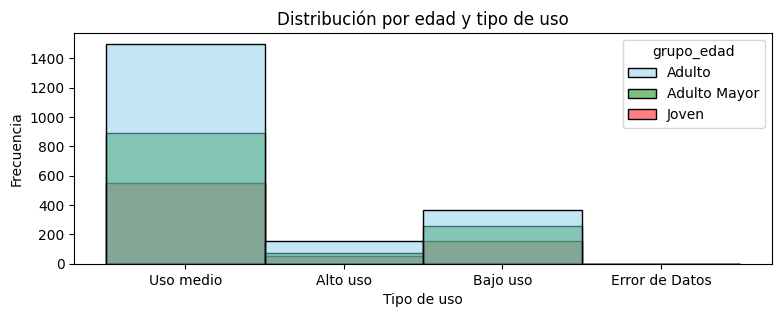

In [ ]:
plt.figure(figsize=(9,3))
sns.histplot(data = user_profile, x='grupo_uso', bins = 4, hue = 'grupo_edad', palette = ['skyblue', 'green', 'red'])
plt.xlabel('Tipo de uso')
plt.ylabel('Frecuencia')
plt.title(f"Distribución por edad y tipo de uso")
plt.show()

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- abc
- abc


🔍 **Segmentos por Edad**
- abc
- abc


📊 **Segmentos por Nivel de Uso**
- abc
- abc


➡️ Esto sugiere que ...


💡 **Recomendaciones**
- abc
- abc


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:**
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?
**Existian valores nulos en algunas columnas (edad y ciudad). Los porcentajes eran bajos (1.3% y 11%) por lo que dependiendo de la columna algunos se imputaron y otros se excluyeron del análisis ya que no había forma de imputarlos (como ciudades ausentes). Por otra parte, las columnas de duration y length presentaban un alto porcentaje de nulos (55% y 44%), no obstante esto no representó problema alguno para el análisis ya que era de esperarse un alto pocentaje de valores ausentes ya que ambas columnas median llamadas y mensajes respectivamente, por lo que era de esperarse que en llamadas se tuviera valor nulo en length ya que no se mide de esa forma y viceversa.**
  
- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?
**La mayoría de los clientes le da un uso medio a su plan de telefonía, es decir, utilizan entre 5 y 10 llamadas y/o mensajes de su plan. La mayoría de estos usuarios 30 y 60 años (50 %). Mientras que los clientes jovenes (menos de 30 años) representan un total de 19% de los clientes totales y los que estan menos representados en los diferentes tipos de uso (alto, medio y bajo).**  
   
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?
**Las personas mayores de 30 años (Adultos y Adultos mayores) porque son los clientes más frecuentes y los que más uso le dan a los servicios de ConnectaTel**
  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?
**Hay un par de clientes que utilizan demasiado los servicios, tanto llamadas y mensajes, en comparación con el promedio de los usarios. No parecen ser errores de captura por lo que se concluye que son datos reales de los usuarios, dado que son cantidades creíbles de uso. Por ejemplo hubo llamadas de más de 2 horas, lo cual es posible cuando por ejemplo una persona esta arreglando un tema con un trámite o una queja con un negocio**

- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?
**Los usuarios del plan básico usan más los servicios que los clientes premium. Pudiera crearse un plan intermedio entre básico y premium (Plan Plus). Enfocado a este 73% de usarios medios que subutilizan el plan premium. También pudieran implementarse planes fleixbles basados en uso real de los usaruos para atraer más de estos clientes. Por ejemplo: Crear un plan profesional con balance entre llamadas y mensajes enfocado adultos en edad laboral, otro plan enfocado a adultos mayores que prefieren más minutos de llamadas que mensajes. Por último otro plan enfocado a los jóvnes que prefieren más datos y mensajes que minutos de llamadas, al igual que promociones para sus apps preferidas. Esto debería incrementar el número de clientes y el uso de los beneficios de los planes, creando así una oferta más atractiva**  

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`